<div style="text-align: right"><b> Jessenia Piza Londoño, Camilo Andrés Gomez Vargas & Paula Lorena Lopez Romero. </b></div>

# Taller 3: Operaciones Morfológicas

Importamos las librerías.

In [1]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np
from copy import copy

Creamos una función para visualizar las imágenes y los resultados de mejor manera.

In [2]:
def plot_images(original, filtered):
    fig, ax = plt.subplots(1,2, figsize=(15,15))
    ax[0].imshow(original, cmap = 'gray')
    ax[0].set_title('Imagen original')
    ax[1].imshow(filtered, cmap = 'gray')
    ax[1].set_title('Imagen filtrada')

Leemos la imagen que utilizaremos alrededor del notebook. Además, la pasamos a imagen binaria y dividimos los valores para que sean sólo 0's y 1's.

In [3]:
mariposa = cv2.imread('mariposa.png')
img = cv2.cvtColor(mariposa, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)
thresh = thresh/255

## Erosión
Creamos el algoritmo de erosión utilizando la convolución de `cv2`.

In [5]:
def erosion(kernel, img):
    im = cv2.filter2D(src = img, ddepth = -1,  kernel = kernel)
    img_new = np.where(im == np.max(im), im, 0)
    img_new = np.where(img_new < np.max(img_new), img_new, 1)
    return img_new

Utilizaremos el siguiente kernel:

In [4]:
kernel = np.array([[0, 1, 0], 
                   [1, 1, 1], 
                   [0, 1, 0]])

Utilizamos erosión en el ejemplo:

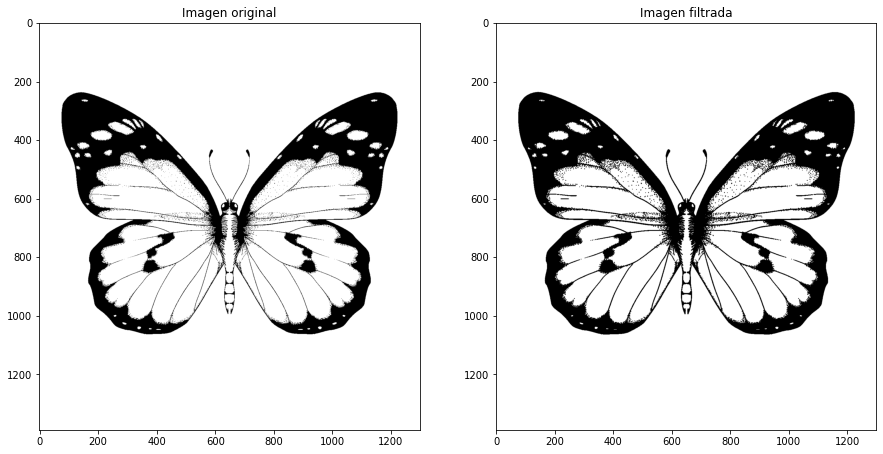

In [6]:
# Erosión
im1 = erosion(kernel, thresh)
plot_images(thresh, im1)

Podemos evidenciar que las zonas en donde está el color negro contrastan más, dado que la erosión elimina el ruido que está en el borde de la figura. 

### Cambio de kernel

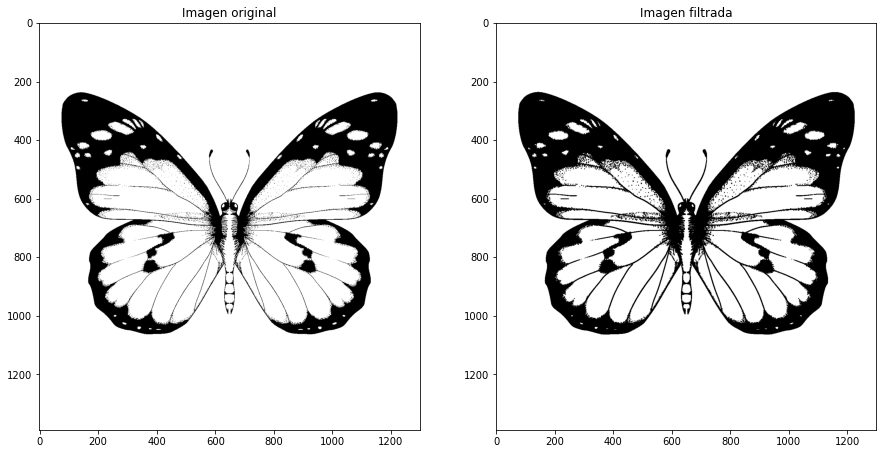

In [8]:
kernel = np.array([[1, 0, 1], 
                   [0, 1, 0], 
                   [1, 0, 1]])
im1 = erosion(kernel, thresh)
plot_images(thresh, im1)

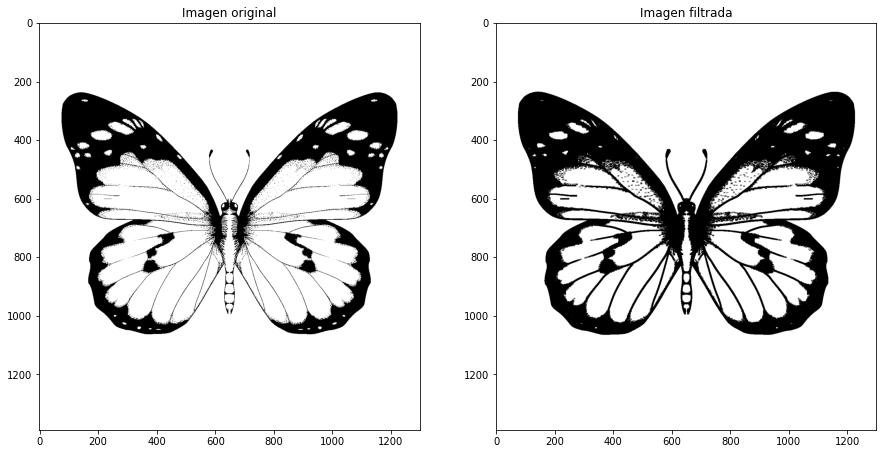

In [10]:
kernel = np.array([[1, 0, 0, 0, 1], 
                   [1, 0, 0, 0, 1], 
                   [1, 1, 1, 1, 1],
                   [1, 0, 0, 0, 1],
                   [1, 0, 0, 0, 1],])

im1 = erosion(kernel, thresh)
plot_images(thresh, im1)

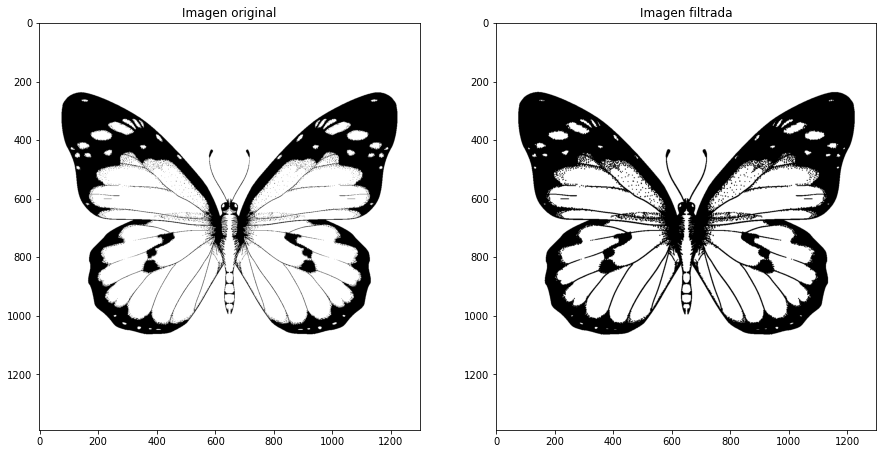

In [11]:
kernel = np.ones((3,3))
im1 = erosion(kernel, thresh)
plot_images(thresh, im1)

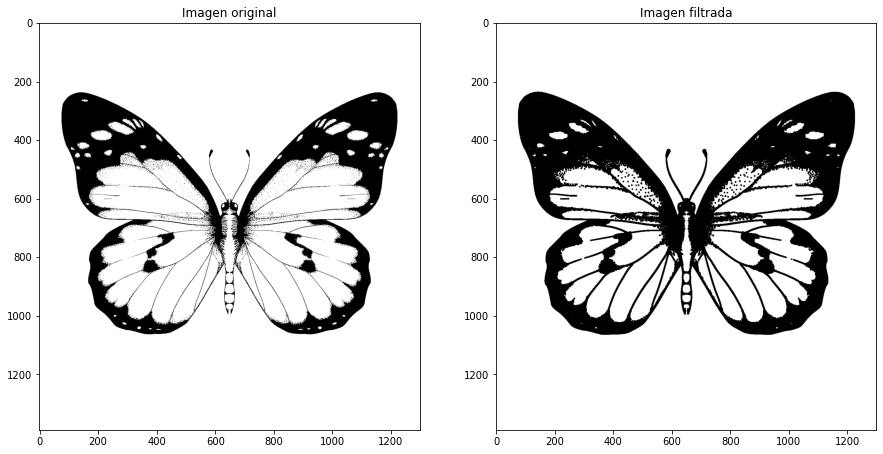

In [12]:
kernel = np.ones((5,5))
im1 = erosion(kernel, thresh)
plot_images(thresh, im1)

Ahora bien, dependiendo del kernel, los bordes pueden tener un comportamiento más brusco o suave.  Es decir, se puede lograr ver con mucho más contraste.  Sin embargo, como es el caso, se pierden algunos detalles de la imagen como por ejemplo, el cuerpo de la mariposa.  Además, la textura también cambia un poco por ejemplo, se pigmenta más las alas y la cara de la mariposa. 

Podemos observar que si la matriz es completamente de 1's, los bordes se ven más gruesos y entre más grande es el kernel, más gruesos los bordes.

## Dilatación

Creamos el algoritmo de dilatación utilizando la convolución de `cv2`.

In [13]:
def dilatation(kernel, img):
    im = cv2.filter2D(src = img, ddepth = -1,  kernel = kernel)
    img_new = np.where(im == 0, im, 1)
    img_new = np.where(img_new != 0, img_new, 0)
    return img_new

Utilizaremos el siguiente kernel:

In [14]:
kernel = np.array([[0, 1, 0], 
                   [1, 1, 1], 
                   [0, 1, 0]])

Utilizamos dilatación con el ejemplo.

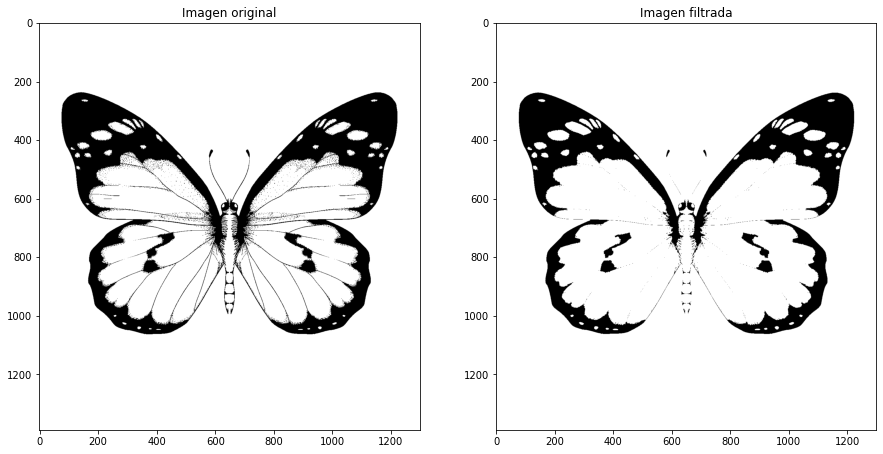

In [15]:
# Dilatación
im2 = dilatation(kernel, thresh)
plot_images(thresh, im2)

Note que, al contrario de la erosión, al encontrar los bordes finos estos son eliminados dado que son considerados como un agujero grande.

### Cambio de kernel

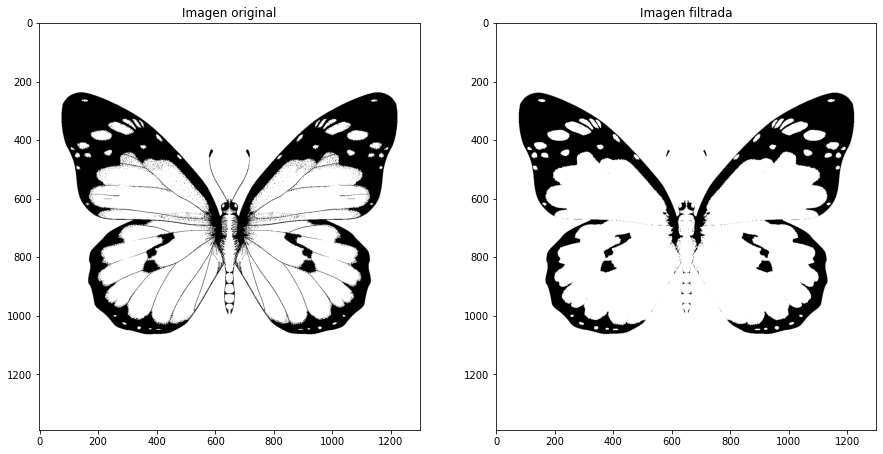

In [16]:
kernel = np.array([[1, 0, 1], 
                   [0, 1, 0], 
                   [1, 0, 1]])
im2 = dilatation(kernel, thresh)
plot_images(thresh, im2)

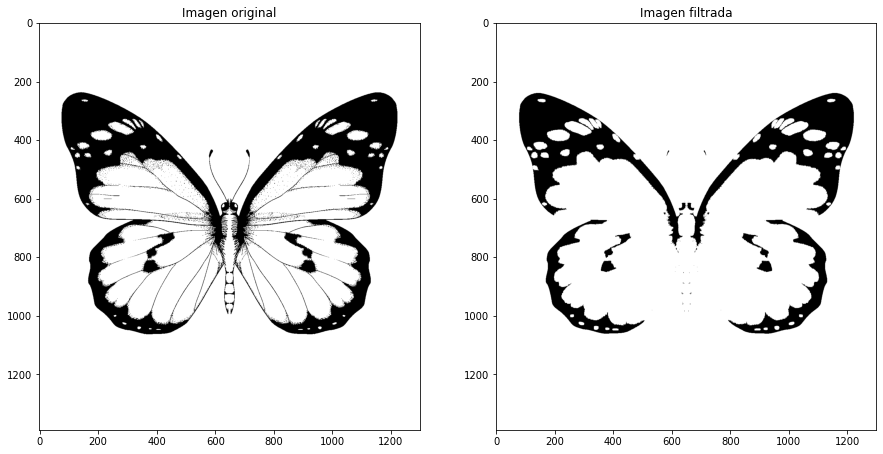

In [17]:
kernel = np.array([[1, 0, 0, 0, 1], 
                   [1, 0, 0, 0, 1], 
                   [1, 1, 1, 1, 1],
                   [1, 0, 0, 0, 1],
                   [1, 0, 0, 0, 1],])

im2 = dilatation(kernel, thresh)
plot_images(thresh, im2)

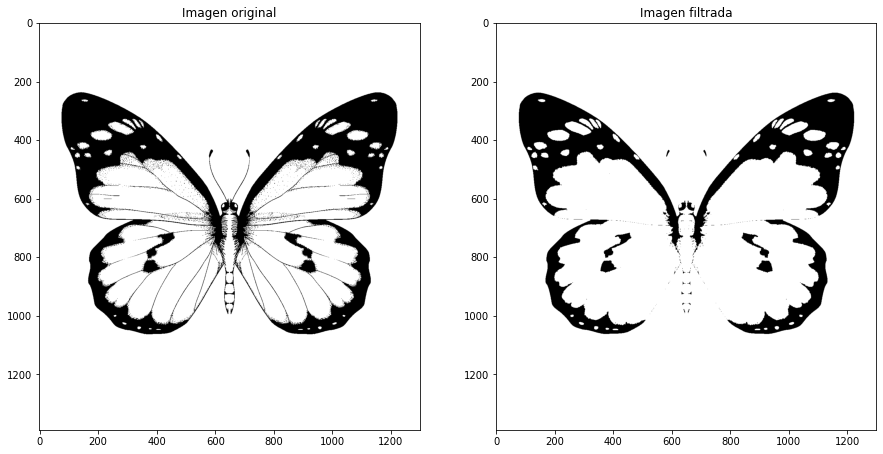

In [18]:
kernel = np.ones((3,3))
im2 = dilatation(kernel, thresh)
plot_images(thresh, im2)

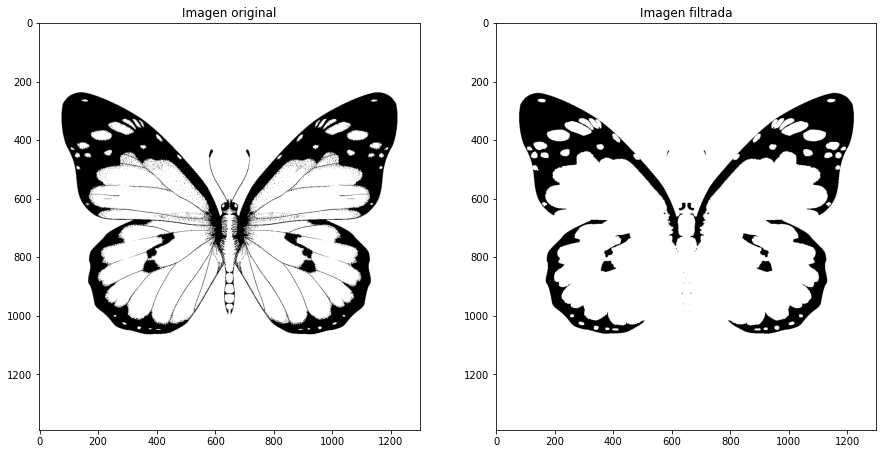

In [19]:
kernel = np.ones((5,5))
im2 = dilatation(kernel, thresh)
plot_images(thresh, im2)

Note que, entre mayor cantidad de 1's y más grande el kernel, se logra observar que se eliminan más los bordes finos de la imagen. De esta manera, se pierde definición y textura de la imagen, por lo que, sólo los bordes gruesos se logran observar de manera adecuada.

## Detección de bordes

Creamos el algoritmo de dilatación utilizando la convolución de `cv2` y utilizamos los dos algoritmos creados anteriormente.

In [24]:
def boundary_detection(kernel, img):
    return abs(dilatation(kernel, img) - erosion(kernel, img))

Utilizaremos el siguiente kernel:

In [25]:
kernel = np.array([[0, 1, 0], 
                   [1, 1, 1], 
                   [0, 1, 0]])

Utilizamos detección de bordes con el ejemplo.

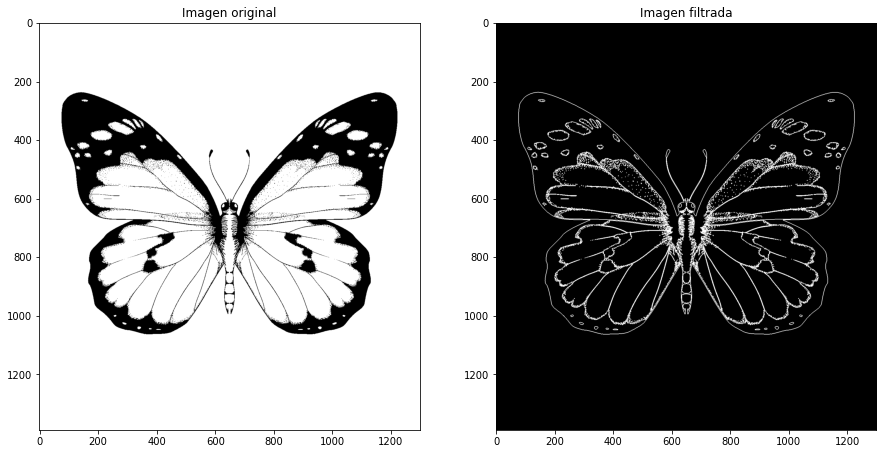

In [26]:
# Detección de bordes
im3 = boundary_detection(kernel, thresh)
plot_images(thresh, im3)

Note que los bordes se logran ver bien definidos y el fondo de la imagen cambia a negro.

### Cambio de kernel

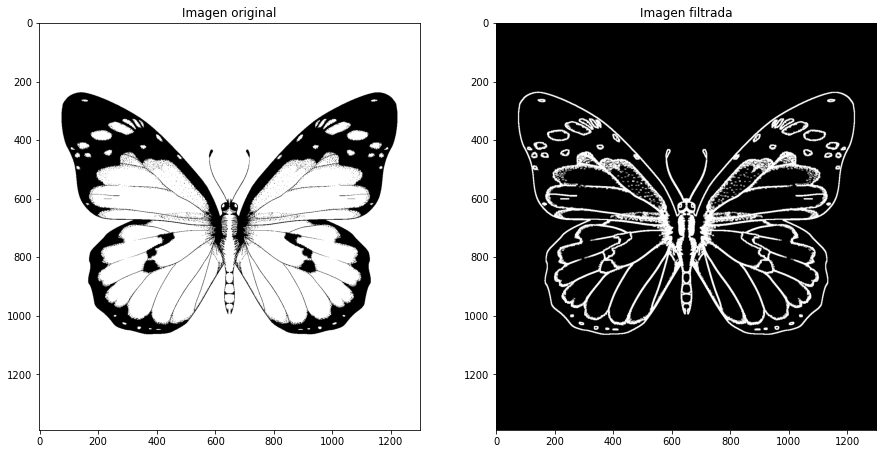

In [27]:
kernel = np.array([[1, 0, 0, 0, 1], 
                   [1, 0, 0, 0, 1], 
                   [1, 1, 1, 1, 1],
                   [1, 0, 0, 0, 1],
                   [1, 0, 0, 0, 1],])

im3 = boundary_detection(kernel, thresh)
plot_images(thresh, im3)

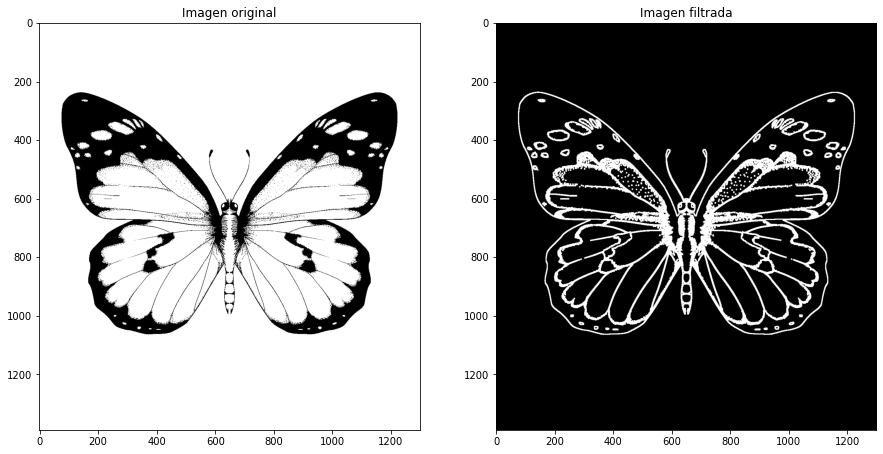

In [30]:
kernel = np.ones((5,5))
im3 = boundary_detection(kernel, thresh)
plot_images(thresh, im3)

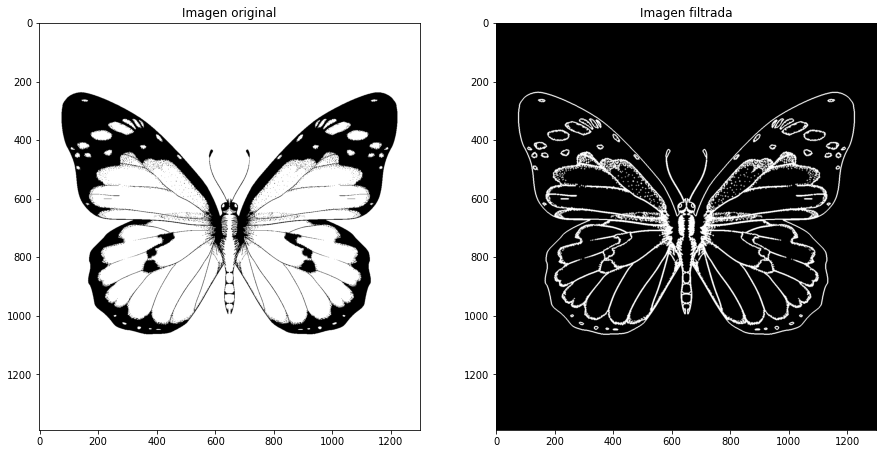

In [32]:
kernel = np.array([[0, 0, 1, 0, 0], 
                   [0, 0, 1, 0, 0], 
                   [1, 1, 1, 1, 1],
                   [0, 0, 1, 0, 0],
                   [0, 0, 1, 0, 0],])
im3 = boundary_detection(kernel, thresh)
plot_images(thresh, im3)

Logramos observar que a mayor cantidad de 1's, los bordes son más gruesos y algunos detalles se pierden. Esto debido a la dilatación que se le hace a la imagen. De manera similar, por la erosión, entre mayor cantidad de 1's, los bordes son más gruesos.

## Relleno de agujeros

Implementamos el algoritmo de relleno de agujeros utilizando erosión.

In [45]:
def region_filling(kernel, img, coords):
    x, y = coords
    X_0 = np.ones(img.shape)
    X_0[y,x] = 0
    conv = erosion(kernel, X_0)
    X_k = cv2.bitwise_or(conv, 1- img)
    count = 1
    while (X_k != X_0).any():
        X_0 = X_k
        conv = erosion(kernel, X_0)
        X_k = cv2.bitwise_or(conv, 1- img)
        count += 1

    im_transform = cv2.bitwise_and(X_k, img)    
    return im_transform, count

Implementamos la función para elegir qué sección de la imagen rellenar.

In [46]:
def click_event(event, x, y, flags, params):
    if event == cv2.EVENT_LBUTTONDOWN:
        im_transform, count = region_filling(kernel, thresh, (x,y))
        print(f'El número de iteraciones que se realizó fueron: {count}')
        cv2.imshow('image', thresh)
        cv2.imshow('image2', im_transform)

    if event==cv2.EVENT_RBUTTONDOWN:
        im_transform, count = region_filling(kernel, thresh, (x,y))
        print(f'El número de iteraciones que se realizó fueron: {count}')
        cv2.imshow('image', thresh)
        cv2.imshow('image2', im_transform)

Escogemos el kernel.

In [47]:
kernel = np.array([[0, 1, 0], 
                   [1, 1, 1], 
                   [0, 1, 0]])

Llamamos la función de rellenar y de interacción con el usuario.

In [48]:
thresh = cv2.resize(thresh, (500,500))
ret, thresh = cv2.threshold(thresh, 0.5, 1, cv2.THRESH_BINARY)
cv2.imshow('image', thresh)
cv2.setMouseCallback('image', click_event)
cv2.waitKey(0)
cv2.destroyAllWindows()

El número de iteraciones que se realizó fueron: 20
El número de iteraciones que se realizó fueron: 20
El número de iteraciones que se realizó fueron: 24
El número de iteraciones que se realizó fueron: 17


### Cambio de kernel

In [49]:
kernel = np.array([[1, 0, 0, 0, 1], 
                   [1, 0, 0, 0, 1], 
                   [1, 1, 1, 1, 1],
                   [1, 0, 0, 0, 1],
                   [1, 0, 0, 0, 1],])
thresh = cv2.resize(thresh, (500,500))
ret, thresh = cv2.threshold(thresh, 0.5, 1, cv2.THRESH_BINARY)
cv2.imshow('image', thresh)
cv2.setMouseCallback('image', click_event)
cv2.waitKey(0)
cv2.destroyAllWindows()

El número de iteraciones que se realizó fueron: 8
El número de iteraciones que se realizó fueron: 10
El número de iteraciones que se realizó fueron: 12


In [50]:
kernel = np.ones(5)
thresh = cv2.resize(thresh, (500,500))
ret, thresh = cv2.threshold(thresh, 0.5, 1, cv2.THRESH_BINARY)
cv2.imshow('image', thresh)
cv2.setMouseCallback('image', click_event)
cv2.waitKey(0)
cv2.destroyAllWindows()

El número de iteraciones que se realizó fueron: 4
El número de iteraciones que se realizó fueron: 6
El número de iteraciones que se realizó fueron: 5
El número de iteraciones que se realizó fueron: 5


In [55]:
kernel = np.array([[0, 0, 1, 0, 0], 
                   [0, 0, 1, 0, 0], 
                   [1, 1, 1, 1, 1],
                   [0, 0, 1, 0, 0],
                   [0, 0, 1, 0, 0],])
thresh = cv2.resize(thresh, (500,500))
ret, thresh = cv2.threshold(thresh, 0.5, 1, cv2.THRESH_BINARY)
cv2.imshow('image', thresh)
cv2.setMouseCallback('image', click_event)
cv2.waitKey(0)
cv2.destroyAllWindows()

El número de iteraciones que se realizó fueron: 10


Logramos observar que si el kernel se parece a una cruz, el rellenado es mejor. Sin embargo, el número de iteraciones es más pequeño cuando el kernel tiene mayor cantidad de 1's. 

<div style="text-align: right"><b> Jessenia Piza Londoño, Camilo Andrés Gomez Vargas & Paula Lorena Lopez Romero. </b></div>